In [1]:
import sympy
import numpy
import scipy
import matplotlib.pyplot as plt

import control

import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

import tclab

In [2]:
Greal = control.tf([1, 2], [2, 3, 4, 1])

In [3]:
ts, ys = control.step_response(Greal)

In [4]:
yinitial = 10
measurement_noise = numpy.random.randn(100)*0.05

In [5]:
ym = ys + yinitial + measurement_noise

In [6]:
def resultplot(K, tau, theta, y0):
    plt.scatter(ts, ym)
    plt.plot(ts, fopdt(ts, K, tau, theta, y0), color='red')
    plt.show()

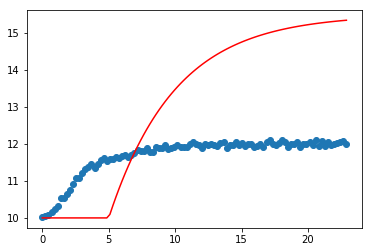

In [7]:
interact(resultplot, 
         K=(1., 10.), 
         tau=(0., 10.), 
         theta=(0., 10.), 
         y0=(0., 20.));

In [8]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, ts, ym, [2, 4, 1, 10])
[K, tau, theta, y0]

[1.9555844218363534,
 2.8589555025760047,
 0.6223361970601751,
 10.051037496284831]

In [17]:
TCLab = tclab.setup(connected=False, speedup=100)
run_time = 1000
setpoint = 30

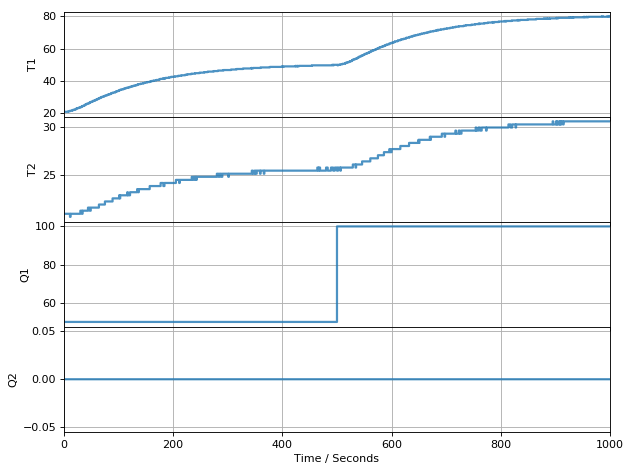

TCLab Model disconnected successfully.


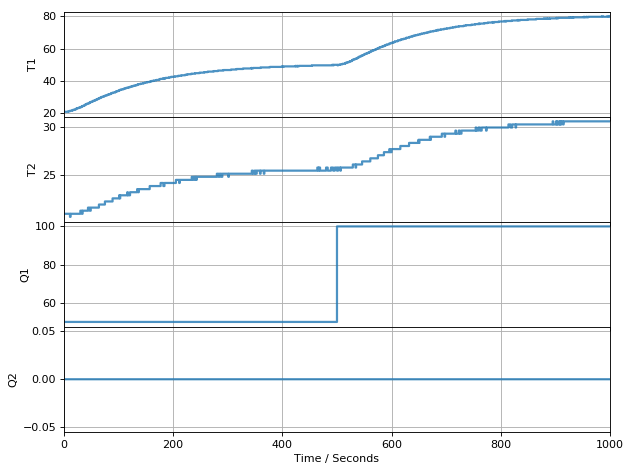

In [30]:
with TCLab() as lab:
    h = tclab.Historian(lab.sources)
    tcplot = tclab.Plotter(h, run_time)
    for t in tclab.clock(run_time):
        lab.Q1(0 if t <run_time/2 else 50)
        tcplot.update(t)

In [31]:
h.get_sessions()

[(1, '2020-02-25 14:31:48', 799)]

In [35]:
h.load_session(1)

In [44]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, h.t, h.logdict['T1'], [2, 4, 100, 50])
[K, tau, theta, y0]

[182.93601764817828,
 2601.4582567468074,
 -0.00024398878967173365,
 25.409445045108423]

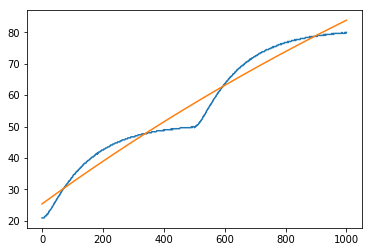

In [46]:
plt.plot(h.t, h.logdict['T1'])
plt.plot(h.t, fopdt(h.t, K, tau, theta, y0))